In [2]:
## importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## loading the dataset
df = pd.read_csv(r"C:\Users\hardi\OneDrive\Desktop\coding\SGP\Smart Agri-system\data\crop_recommendation.csv")

print("Dataset Loaded Successfully")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

Dataset Loaded Successfully
    N   P   K  temperature   humidity        ph    rainfall  crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Shape: (2200, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: f

In [4]:
## data cleaning and preprocessing
print("\nMissing Values:\n", df.isnull().sum())
df = df.dropna()

print("\nDuplicate Entries:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("cleaned dataset shape:", df.shape)


Missing Values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

Duplicate Entries: 0
cleaned dataset shape: (2200, 8)


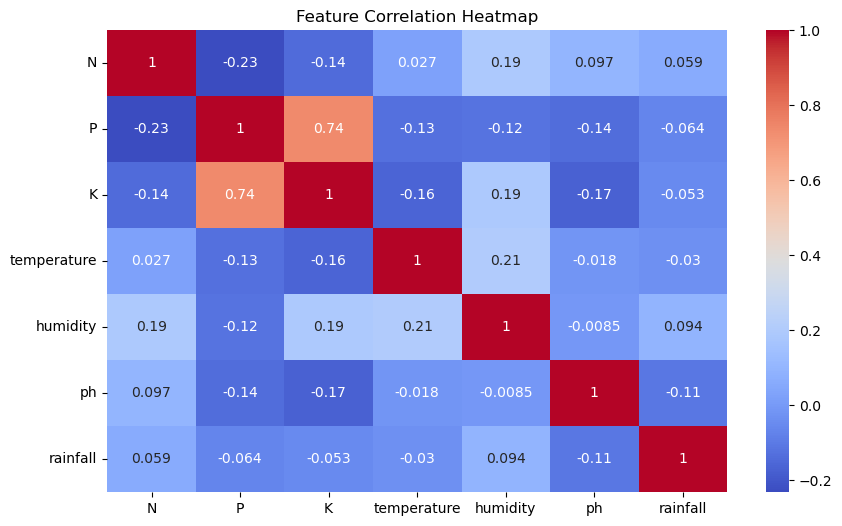

In [5]:
## Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
## Feature and Target Separation
X = df.drop("crop", axis=1)
y = df["crop"]

print("\nFeatures Shape:", X.shape)
print("Target Shape:", y.shape)


Features Shape: (2200, 7)
Target Shape: (2200,)


In [7]:
## train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (1760, 7)
Testing Features Shape: (440, 7)


In [8]:
## feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
## model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nModel Trained Successfully")


Model Trained Successfully


In [10]:
## model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1

In [13]:
## test prediction
sample_data = np.array([[89,60,19,25.19192419,66.69029010000001,5.913664501,78.06639649]])  # Example feature values
sample_data_scaled = scaler.transform(sample_data)
predicted_crop = model.predict(sample_data_scaled)
print("\nPredicted Crop for Sample Data:", predicted_crop[0])


Predicted Crop for Sample Data: maize


c:\Users\hardi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
## model saving
import pickle

pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))